In [2]:
#Name: Amna Ashraf
#Email: aamna5429@gmail.com

In [3]:
# Dataset - https://www.kaggle.com/datasets/salader/dogs-vs-cats

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


cp: cannot stat 'kaggle.json': No such file or directory


In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:35<00:00, 33.9MB/s]
100% 1.06G/1.06G [00:36<00:00, 31.7MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()


In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [8]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)


In [9]:
#create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [11]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [12]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)


Epoch 1/10
625/625 [==============================] - 76s 105ms/step - loss: 1.4341 - accuracy: 0.5721 - val_loss: 0.6419 - val_accuracy: 0.6452
Epoch 2/10
625/625 [==============================] - 63s 100ms/step - loss: 0.5932 - accuracy: 0.6811 - val_loss: 0.5877 - val_accuracy: 0.6744
Epoch 3/10
625/625 [==============================] - 64s 102ms/step - loss: 0.5114 - accuracy: 0.7462 - val_loss: 0.5210 - val_accuracy: 0.7354
Epoch 4/10
625/625 [==============================] - 68s 108ms/step - loss: 0.4394 - accuracy: 0.7954 - val_loss: 0.4664 - val_accuracy: 0.7834
Epoch 5/10
625/625 [==============================] - 68s 108ms/step - loss: 0.3826 - accuracy: 0.8299 - val_loss: 0.4600 - val_accuracy: 0.7846
Epoch 6/10
625/625 [==============================] - 64s 103ms/step - loss: 0.3231 - accuracy: 0.8620 - val_loss: 0.4637 - val_accuracy: 0.7974
Epoch 7/10
625/625 [==============================] - 67s 107ms/step - loss: 0.2493 - accuracy: 0.8973 - val_loss: 1.0640 - val_ac

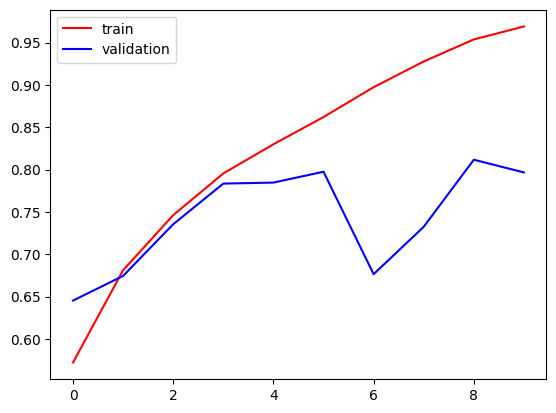

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()



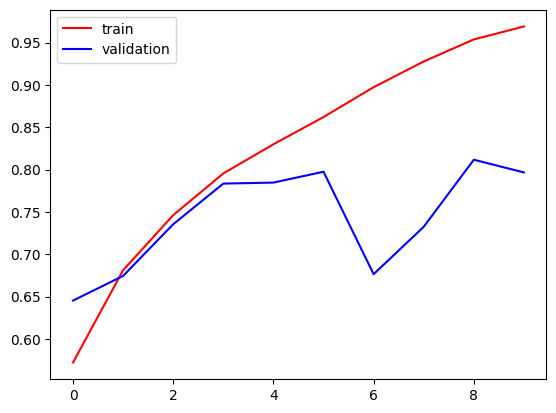

In [14]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

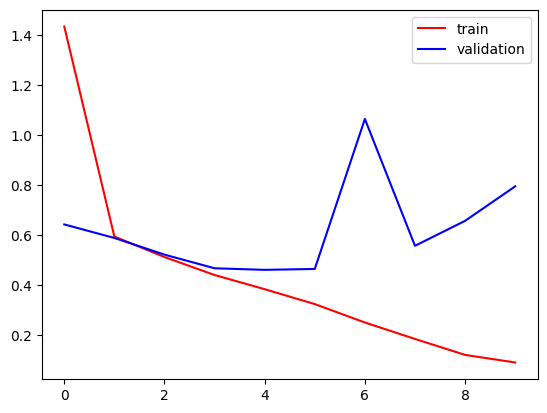

In [15]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

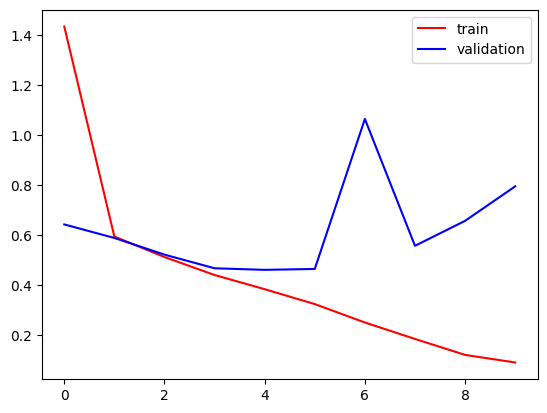

In [16]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [17]:
import cv2

In [18]:
test_img = cv2.imread('/content/dog-.webp')

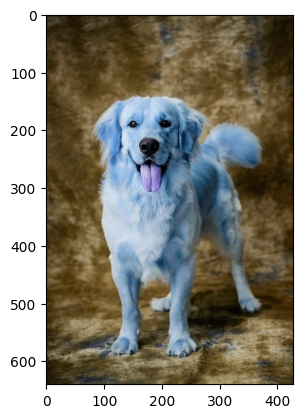

In [19]:
plt.imshow(test_img)

In [20]:
test_img.shape

(640, 427, 3)

In [21]:
test_img = cv2.resize(test_img,(256,256))


test_input = test_img.reshape((1,256,256,3))


In [22]:
model.predict(test_input)

1/1 [==============================] - 0s 432ms/step


array([[0.]], dtype=float32)